In [ ]:
import sys
import math
sys.path.append("../bdot10kseg")
from collections import defaultdict

from semseg_dataset import BDOT10kSemSeg
from detection_dataset import BDOT10kDetection
from instanceseg_dataset import BDOT10kInstanceSeg
import os

from tqdm import tqdm
from glob import glob
from rasterio.features import rasterize


import cv2
import rasterio
import shapely
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [2]:
flist = [os.path.join("../dataset/images", x.rstrip()) for x in open("../data/bdot10kseg-463.txt")]
SIZE = 1024
CAT_CSV = "../data/BDOT10k-categories.csv"
SHP_DIR = "../dataset/SHP"
POW_SHP = "../dataset/powiaty/powiaty.shp"

## object detection dataset

Found 463
Found 380 powiats
SHPs: 25145
Classes: 12


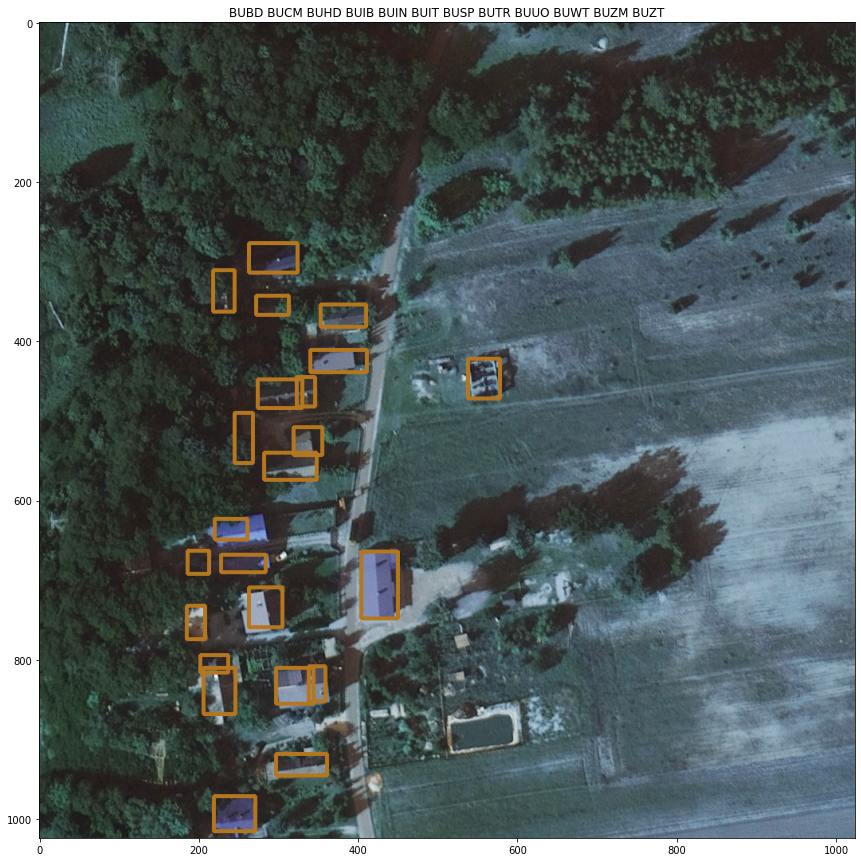

In [3]:
dataset = BDOT10kDetection(
     tiff_dir=flist,
     shp_dir=SHP_DIR,
     powiaty_shp_fname=POW_SHP,
     bdot10k_cats_fname=CAT_CSV,
     level=1,
     size=SIZE,
     classes="BU"
)

for ii,b in enumerate(dataset):
    img, label, fname = b
    if label['labels'].shape[0] == 0:
        continue
    dataset.plot_sample(img, label, show=True)
    break

##  Binary semseg

Found 463
Found 380 powiats
SHPs: 25145
Classes: 1


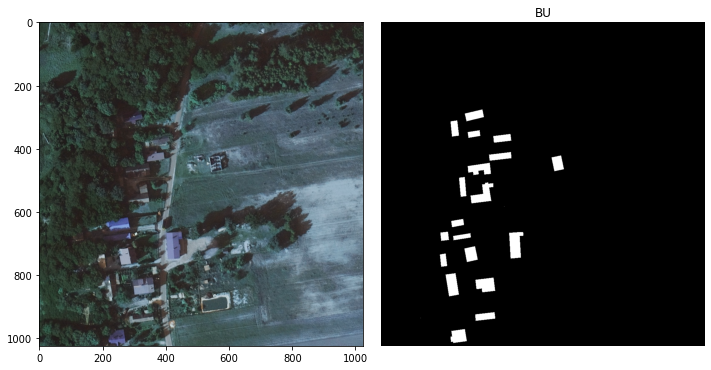

In [4]:
dataset = BDOT10kSemSeg(
     tiff_dir=flist,
     shp_dir=SHP_DIR,
     powiaty_shp_fname=POW_SHP,
     bdot10k_cats_fname=CAT_CSV,
     level=0,
     size=SIZE,
     classes="BU",
     binary=True
)

for ii,b in enumerate(dataset):
    img, mask, pth = b
    dataset.plot_sample(img, mask, show=True)
    break

## multilabel semseg

Found 463
Found 380 powiats
SHPs: 25145
Classes: 12


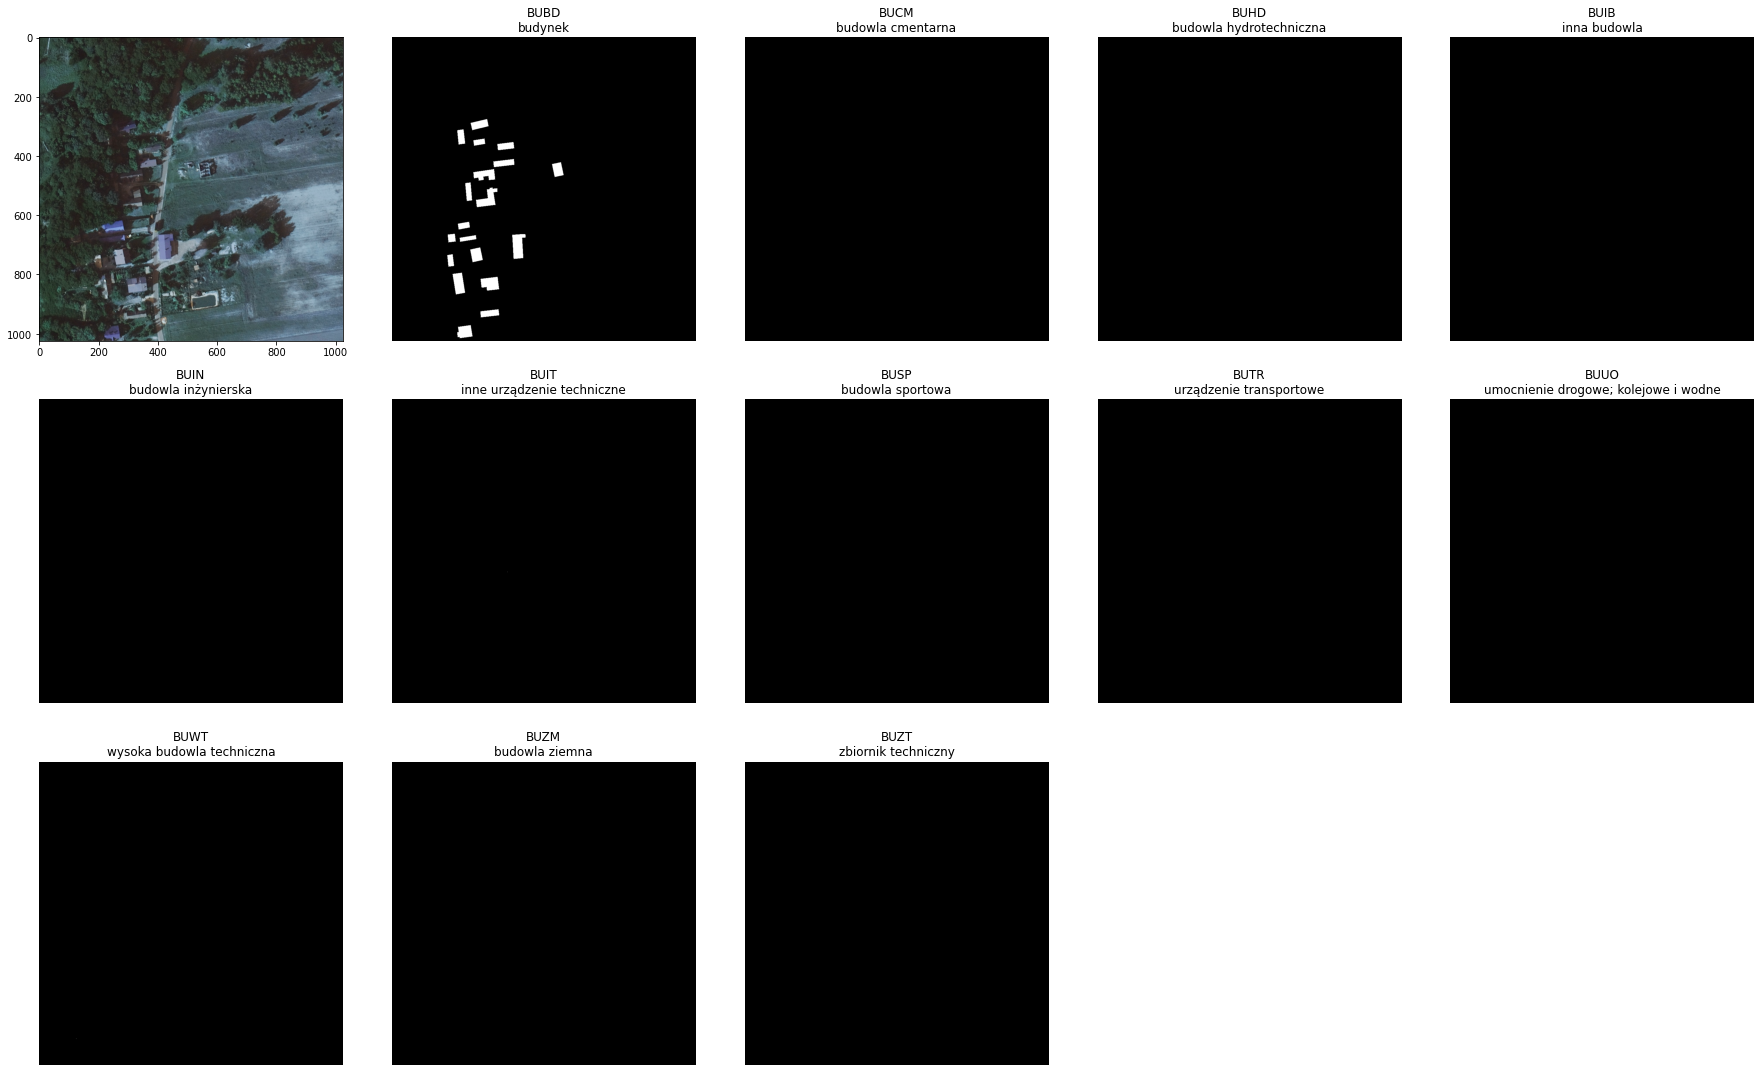

In [5]:
dataset = BDOT10kSemSeg(
     tiff_dir=flist,
     shp_dir=SHP_DIR,
     powiaty_shp_fname=POW_SHP,
     bdot10k_cats_fname=CAT_CSV,
     level=1,
     size=SIZE,
     classes="BU",
     binary=False
)

for ii,b in enumerate(dataset):
    img, mask, pth = b
    dataset.plot_sample(img, mask, show=True)
    break

## instanceseg

In [ ]:
dataset = BDOT10kInstanceSeg(
     tiff_dir=flist,
     shp_dir=SHP_DIR,
     powiaty_shp_fname=POW_SHP,
     bdot10k_cats_fname=CAT_CSV,
     level=0,
     size=SIZE,
     classes="BU"
)

for ii,b in enumerate(dataset):
    img, label, fname = b
    if label['labels'].shape[0] == 0:
        continue
    dataset.plot_sample(img, label, show=True)
    break